In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load the data
file_path = "data/DEU_SN_Dresden.AP.104880_TMYx.2007-2021 (1)/DEU_SN_Dresden.AP.104880_TMYx.2007-2021.epw"  # Replace with your file path
data_start_line = 8  # For example, if your data starts at line 9, put 8 here (since Python is zero-indexed)

df = pd.read_csv(file_path, skiprows=data_start_line)

In [13]:
# Rename the columns for clarity
df.rename(columns={'2014': 'Year', '1': 'Month', '1.1': 'Day', '1.2': 'Hour', '0.50': 'Temperature'}, inplace=True)

# Keep only the relevant columns
df = df[['Year', 'Month', 'Day', 'Hour', 'Temperature']]

# Convert the 'Temperature' column to numeric, if not already done
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

# Find the hottest and coldest days
hottest_day = df.loc[df['Temperature'].idxmax()]
coldest_day = df.loc[df['Temperature'].idxmin()]

# Filter the DataFrame for the hottest day
hottest_day_df = df[(df['Year'] == hottest_day['Year']) & (df['Month'] == hottest_day['Month']) & (df['Day'] == hottest_day['Day'])]

# Filter the DataFrame for the coldest day
coldest_day_df = df[(df['Year'] == coldest_day['Year']) & (df['Month'] == coldest_day['Month']) & (df['Day'] == coldest_day['Day'])]

# Display the results
print("Hottest Day Data:")
print(hottest_day_df)
print("\nColdest Day Data:")
print(coldest_day_df)


Hottest Day Data:
      Year  Month  Day  Hour  Temperature
5087  2017      8    1     1         19.8
5088  2017      8    1     2         19.5
5089  2017      8    1     3         19.2
5090  2017      8    1     4         19.5
5091  2017      8    1     5         19.5
5092  2017      8    1     6         20.0
5093  2017      8    1     7         20.0
5094  2017      8    1     8         19.0
5095  2017      8    1     9         21.0
5096  2017      8    1    10         22.0
5097  2017      8    1    11         25.0
5098  2017      8    1    12         26.0
5099  2017      8    1    13         28.0
5100  2017      8    1    14         31.0
5101  2017      8    1    15         32.0
5102  2017      8    1    16         31.0
5103  2017      8    1    17         31.0
5104  2017      8    1    18         30.0
5105  2017      8    1    19         29.0
5106  2017      8    1    20         27.0
5107  2017      8    1    21         21.0
5108  2017      8    1    22         21.0
5109  2017      

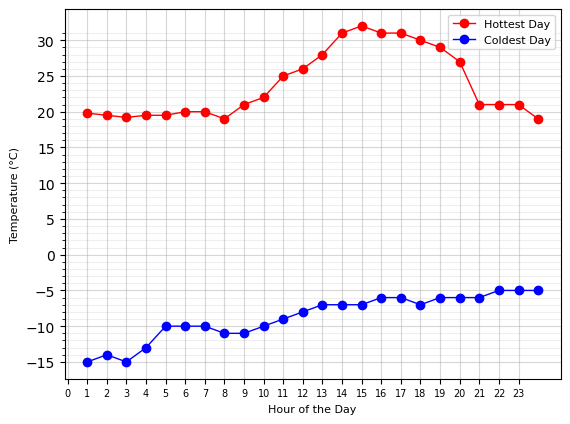

In [14]:
# Plotting
plt.plot(hottest_day_df['Hour'], hottest_day_df['Temperature'], label='Hottest Day', color='red', marker='o', linewidth=1)
plt.plot(coldest_day_df['Hour'], coldest_day_df['Temperature'], label='Coldest Day', color='blue', marker='o', linewidth=1)

# Adding title and labels with smaller font sizes
plt.xlabel('Hour of the Day', fontsize=8)
plt.ylabel('Temperature (°C)', fontsize=8)

# Setting X and Y ticks
plt.xticks(range(0, 24, 1), fontsize=7)  # Hour ticks with smaller font

# Custom Y-axis ticks
ax = plt.gca()
y_max = max(hottest_day_df['Temperature'].max(), coldest_day_df['Temperature'].max())
y_min = min(hottest_day_df['Temperature'].min(), coldest_day_df['Temperature'].min())

major_ticks = np.arange(np.floor(y_min), np.ceil(y_max), 5)
minor_ticks = np.arange(np.floor(y_min), np.ceil(y_max), 1)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a grid
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.legend(fontsize=8)  # Smaller font for legend

# Show plot
plt.show()